In [2]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB', 'COLOR_BGR2LUV', 'COLOR_BGR2Lab', 'COLOR_BGR2Luv', 'COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ', 'COLOR_BGR2YCR_CB', 'COLOR_BGR2YCrCb', 'COLOR_BGR

In [ ]:
low_yellow = np.uint8([[[20,100,100 ]]])
low_hsv_y = cv2.cvtColor(low_yellow,cv2.COLOR_RGB2HSV)
up_yellow = np.uint8([[[25,255,255 ]]])
up_hsv_y = cv2.cvtColor(up_yellow,cv2.COLOR_RGB2HSV)
print(low_hsv_y, up_hsv_y)

In [ ]:
low_bound_yellow_hsv = np.uint8([[[90, 204,100]]])
upper_bound_yellow_hsv = np.uint8([[[90, 230,255]]])
low_yellow_rgb = cv2.cvtColor(low_bound_yellow_hsv, cv2.COLOR_HSV2RGB)
upper_bound_yellow_rgb = cv2.cvtColor(upper_bound_yellow_hsv, cv2.COLOR_HSV2RGB)
print(low_yellow_rgb,upper_bound_yellow_rgb)

In [ ]:
example_grid = '../calibration_images/example_grid2.jpg'
im = cv2.imread(example_grid)
height,width,depth = im.shape
circle_img = np.zeros((height,width), np.uint8)
cv2.rectangle(circle_img, (0 ,np.int(height*5/12)),(np.int(width) ,np.int(height)), 1, thickness=-1)

masked_data = cv2.bitwise_and(im, im, mask=circle_img)

cv2.imshow("masked", masked_data)
cv2.waitKey(27)

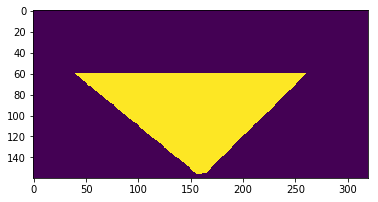

In [6]:

a3 = np.array( [[[156,155],[40,60],[260,60],[165,154]]], dtype=np.int32 )
im = np.zeros([160,320],dtype=np.uint8)
cv2.fillPoly( im, a3, 255 )

plt.imshow(im)
plt.show()

In [19]:
img = np.zeros((512,512,3), dtype=np.uint8)

# Draw a polygon
pts = np.array([[156,155],[1,43],[0,43],[0,160],[320,160],[320,43],[319,43],[165,154]], dtype=np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img,[pts],True,(0,255,255))

#Display the image
cv2.imshow("img",img)

cv2.waitKey(0)

-1

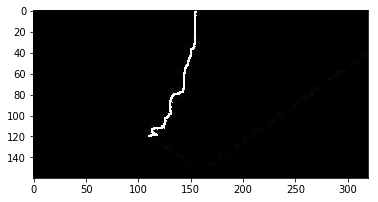

In [18]:
warped_wall = '../output/warped_example.jpg'
im = cv2.imread(warped_wall)

height,width,depth = im.shape

poly_img = np.zeros((height,width), np.uint8)

a3 = np.array( [[[157,153],[1,42],[0,42],[0,0],[320,0],[320,43],[319,43],[165,153]]], dtype=np.int32 )
cv2.fillPoly( poly_img, a3, 1 )
masked_data = cv2.bitwise_and(im, im, mask=poly_img)

plt.imshow(masked_data)
plt.show()